### Проект: Статистический анализ данных  сервиса аренды самокатов GoFast

    Для анализа имеются данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
    
    с подпиской Ultra
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно.
      В процессе работы необходимо рассчитать частоту встречаемости городов, долю пользователей с подпиской и без, оценить возраст пользователей, рассчитать расстояние,которое пользователь преодолевает за одну поездку и общее расстояние,которое проехал пользователь за месяц.
      Необходимо исследовать и проанализировать поведение пользователей с подпиской и без нее:
  - Определить одинаковое ли время тратят на поездки пользователи  с подпиской и без;
  - Определить среднее рассояние,  которое проезжают пользователи с подпиской, не больше ли оно рекомендуемого техническими характеристиками для использования самоката 3130 м; 
  - Определить какую выручку приносит одна и вторая группа пользователей, и кто выгоднее для бизнеса: пользователи с подпиской или без.
  
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Шаг 1. Загрузка данных Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы. Пути к файлам

In [2]:
user = pd.read_csv('/datasets/users_go.csv')
ride = pd.read_csv('/datasets/rides_go.csv')
subscription = pd.read_csv('/datasets/subscriptions_go.csv')


#### Изучим общую информацию о каждом датафрейме Выведем первые строки каждого набора данных. 


In [3]:
user.info()
user.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
ride.info()
ride.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
subscription.info()
subscription.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


После изучения общей информации можем сделать вывод,что имеем 3 набора данных, типы данных в которых указаны корректно, кроме столбца 'date'

### Шаг 2. Предобработка данных

####  Приведем столбец date к типу даты pandas.

In [6]:
ride['date'] = pd.to_datetime(ride['date'], format='%Y-%m-%dT%H:%M:%S' )


In [7]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца date

In [8]:
ride['month'] = ride['date'].dt.month 


In [9]:
ride['date'].unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-04-20T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-28T00:00:00.000000000', '2021-10-09T00:00:00.000000000',
       '2021-10-19T00:00:00.000000000', '2021-11-06T00:00:00.000000000',
       '2021-11-14T00:00:00.000000000', '2021-11-22T00:00:00.000000000',
       '2021-12-14T00:00:00.000000000', '2021-12-22T00:00:00.000000000',
       '2021-03-15T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-06-20T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-08-03T00:00:00.000000000', '2021-10-27T00:00:00.000000000',
       '2021-12-18T00:00:00.000000000', '2021-01-31T00:00:00.000000000',
       '2021-02-24T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-05-07

In [10]:
ride.head(20)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


#### Проверяем наличие пропущенных значений и дубликатов в датафреймах. Обрабатываем их, если такие значения присутствуют

In [11]:
user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
ride.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [14]:
user.duplicated().sum()

31

In [15]:
user =user.drop_duplicates(subset=['user_id','name', 'age','city','subscription_type'])

In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [17]:
ride.duplicated().sum()

0

Проведя предобработку данных было выявлено, что в данных датафреймах пропущенные значения отсутствуют. В датафрейме user были обнаружены и удалены 31 дубликат.

### Шаг 3. Исследовательский анализ данных

 #### Описываем и визуализируем общую информацию о пользователях и поездках:  частота встречаемости городов.
    

In [18]:
user['city'].value_counts()


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

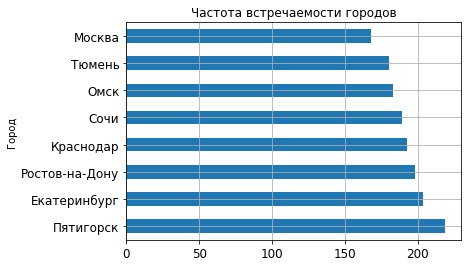

In [19]:
user['city'].value_counts().plot.barh(title='Частота встречаемости городов', xlabel='Город', ylabel='Количество', fontsize=12, grid=True );


#### Описываем и визуализируем соотношение пользователей с подпиской и без

In [20]:
user['subscription_type'].value_counts()


free     835
ultra    699
Name: subscription_type, dtype: int64

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без'}, ylabel='subscription_type'>

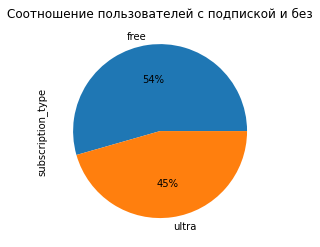

In [21]:
user['subscription_type'].value_counts().plot.pie(title='Соотношение пользователей с подпиской и без', autopct='%i%%')


#### Соотношение возраста пользователей

In [22]:
user['age'].value_counts();



Text(0, 0.5, 'Количество пользователей')

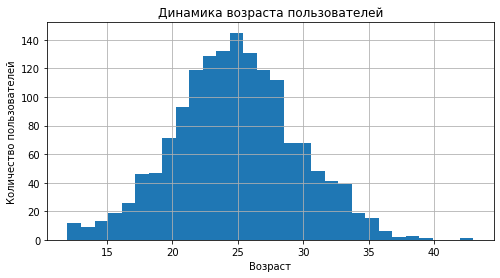

In [23]:
age_hist = user['age'].plot(kind = 'hist', title ='Динамика возраста пользователей', grid = True,figsize= (8, 4),bins=30)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')



In [24]:
user['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### Оценим  расстояние, которое пользователь преодолел за одну поездку

Text(0, 0.5, 'Количество пользователей.')

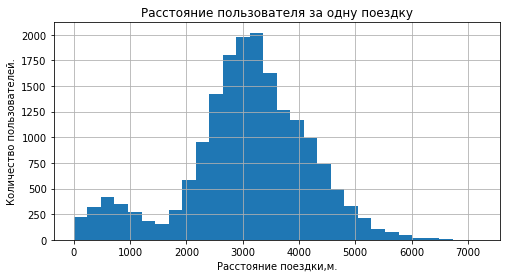

In [25]:
distance_hist = ride['distance'].plot(kind='hist', title='Расстояние пользователя за одну поездку',grid= True, figsize=(8, 4),bins=30)
plt.xlabel('Расстояние поездки,м.')
plt.ylabel('Количество пользователей.')



In [26]:
round(ride['distance'].mean(), 2)

3070.66

In [27]:
ride['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [28]:
ride.query('distance == 0.855682925681208')

,user_id,distance,duration,date,month
11555,1069,0.855683,10.001902,2021-01-31,1


In [29]:
ride.query('6000 <= distance <= 7500')

,user_id,distance,duration,date,month
6860,724,6225.520342,0.500000,2021-12-16,12
7043,737,6386.938020,25.967345,2021-07-31,7
7052,738,6059.653105,21.149133,2021-05-02,5
7185,747,6010.194283,18.025486,2021-03-10,3
7612,780,6112.644835,0.500000,2021-11-23,11
7617,781,6105.098017,19.210196,2021-01-11,1
7632,781,6086.437000,26.877662,2021-12-21,12
7635,782,6395.396068,28.982735,2021-02-22,2
7830,795,6262.302747,0.500000,2021-09-09,9
7913,803,6427.053056,16.854106,2021-01-05,1


#### Опишем и визуализируем общую информацию о продолжительности поездок

Text(0, 0.5, 'Количество пользователей')

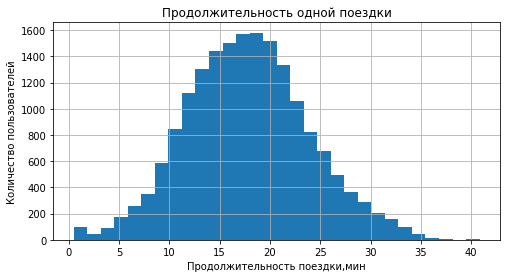

In [30]:
duration_hist = ride['duration'].plot(kind='hist', title='Продолжительность одной поездки',grid= True, figsize=(8, 4), bins = 30)
plt.xlabel('Продолжительность поездки,мин')
plt.ylabel('Количество пользователей')




In [31]:
round(ride['duration'].mean(), 2)

17.81

In [32]:
ride['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [33]:
ride.query('35 <= duration <= 40')

,user_id,distance,duration,date,month
42,4,4649.488243,35.896929,2021-08-14,8
143,15,4187.621459,38.125729,2021-01-13,1
499,55,4151.081878,36.906491,2021-06-30,6
524,58,4763.920660,35.819603,2021-02-17,2
854,91,4444.579979,35.222900,2021-11-05,11
1111,119,4060.082639,35.360496,2021-05-15,5
1455,158,3967.285849,35.803715,2021-05-09,5
1621,174,3794.401307,35.766408,2021-12-23,12
1694,183,4473.798120,36.402535,2021-01-02,1
1894,205,4218.386189,36.310317,2021-08-26,8


In [34]:
ride.query('duration <= 1')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Проведя исследовательский анализ можем сделать вывод, что наибольшее количество пользователей из города в Пятигорск, Екатеринбург и Ростов-на-Дону, наименьшее из Москвы. Пользователи с подпиской составляют примерно 46%, без подписки - 54%.
Возраст пользователей колеблется от 13 до 43 лет, наибольшее количество пользователей возраста 22-28, наименьшее - 37-39 и 43г.
Среднее расстояние,которое пользователь проезжает за поездку равно 3070м, но есть и пользователи с совсем небольшими дистанциями 850 м и довольно большими около 7200 м. Средняя продолжительность поездки составляет 17.81, однако есть и небольшое количество "долгих" поездок от 35 до 40 минут мин,что может быть обусловлено расстоянием, практически во всех случаях значительно больше среднего.Кроме этого выявлены и аномально короткие поездки 0.5 и дистанцией около 4000м, что не отражает действительность и скорее всего является технической ошибкой.

### Шаг 4. Объединение данных

####  Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge()


In [35]:
user1 = user.merge(ride, on='user_id')




In [36]:
total = user1.merge(subscription, on='subscription_type')

In [37]:
total

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [38]:
len(user)


1534

In [39]:
len(ride)

18068

In [40]:
len(total)

18068

In [41]:
total.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

####  Создадим ещё два датафрейма из датафрейма total, созданного на этапе 4.1:

    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.

In [42]:
total_free = total[total['subscription_type'] == "free"]
total_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [43]:
total_ultra = total[total['subscription_type'] == "ultra"]
total_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [44]:
len(total)

18068

In [45]:
len(total_ultra) + len(total_free)

18068

#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

In [46]:
total_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [47]:
total_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

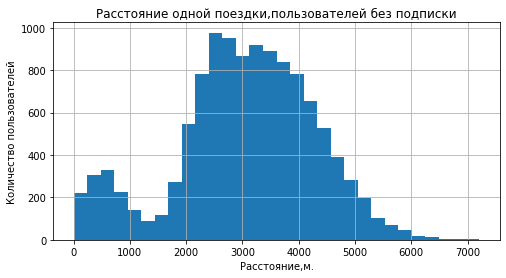

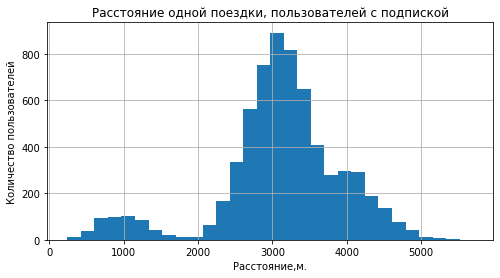

In [48]:
free_dist = total_free[['distance']].plot(kind='hist', title='Расстояние одной поездки,пользователей без подписки',grid= True, figsize=(8, 4), bins = 30, legend=False)
plt.xlabel('Расстояние,м.')
plt.ylabel('Количество пользователей');


ultra_dist = total_ultra[['distance']].plot(kind='hist', title='Расстояние одной поездки, пользователей с подпиской',grid= True, figsize=(8, 4), bins = 30, legend=False)
plt.xlabel('Расстояние,м.')
plt.ylabel('Количество пользователей');




In [49]:
total_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [50]:
total_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'Количество пользователей')

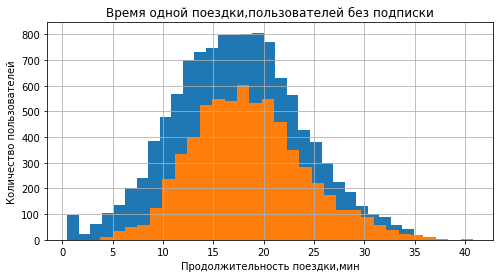

In [51]:
free_dur = total_free['duration'].plot(kind='hist', title='Время одной поездки,пользователей без подписки',grid= True, figsize=(8, 4), bins = 30, legend=False)
plt.xlabel('Продолжительность поездки,мин')
plt.ylabel('Количество пользователей');


ultra_dur = total_ultra['duration'].plot(kind='hist', title='Время одной поездки,пользователей без подписки',grid= True, figsize=(8, 4), bins = 30, legend=False)
plt.xlabel('Продолжительность поездки,мин')
plt.ylabel('Количество пользователей')

In [52]:
total['duration'] = np.ceil(total['duration'])


В данном разделе мы производим объединение датафреймов и из объединенного датафрейма формируем 2 новых: total_free, хранящий информацию о пользователях без подписки и total_ultra хранящий информацию о пользователях с подпиской.После объединения  и создания новых датафреймов производим проверку на "корректность":проверяем количество строк в каждом из датафреймов, а также делаем проверку на наличие пропущенных значенийб также производим округление по столбцу 'duration'.
По полученным датафреймам пользователей с подпиской и без делаем визуализацию:
1. По расстоянию одной поездки.По данной визуализации можем сделать вывод, что пользователи без подписки ведут себя более непредсказуемо, у них больший диапазон разброса данных от 0.85м(что говорит о том что возможно пользователь взял самокат и передумал его использовать) до 7211м,  в то время как у пользователей с подпиской диапазон от 244м до 5699м. Средняя продолжительность у двух категорий отличается незначительно: у пользователей free - 3045м , у ultra - 3115м.
На обоих графиках есть небольшие пики, коротких поездок, однако у пользователей без подписки их частота гораздо выше.
2. По времени одной поездки имеем графики похожего вида, однако у пользователй без подписки, есть часть значений(95),c аномально короткой продолжительностью 0.5мин и большой дистанцией,что скорее всего является технической ошибкой, а максимальное значение около 35мин, у пользоватлей с подпиской диапазон меньше: от 3.7 мин до 40.82.Средняя продолжительность поездки у пользователей с подпиской чуть больше - 18.54 мин,без подписки - 17.39 мин.
Складывается ощущение,что пользователи с подпиской используют самокаты осознаннее,более упорядочеено, чаще их берут на средние и длинные дистанции на более длительное время.

### Шаг 5. Подсчёт выручки

#### Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


In [53]:
total_gr = total.groupby(['user_id', 'month', 'minute_price','start_ride_price', 'subscription_fee'], as_index=False).agg({'distance':['count','sum'], 'duration':'sum'})
total_gr

user_id month minute_price start_ride_price subscription_fee distance  \
                                                                      count   
0           1     1            6                0              199        2   
1           1     4            6                0              199        1   
2           1     8            6                0              199        2   
3           1    10            6                0              199        2   
4           1    11            6                0              199        3   
...       ...   ...          ...              ...              ...      ...   
11326    1534     6            8               50                0        2   
11327    1534     8            8               50                0        2   
11328    1534     9            8               50                0        1   
11329    1534    11            8               50                0        4   
11330    1534    12            8               50                0        1   

                    duration  
                sum      sum  
0       7027.511294     42.0  
1        754.159807      7.0  
2       6723.470560     46.0  
3       5809.911100     32.0  
4       7003.499363     56.0  
...             ...      ...  
11326   3409.468534     26.0  
11327   7622.453034     48.0  
11328   4928.173852     23.0  
11329  13350.015305     78.0  
11330   2371.711192     16.0  

[11331 rows x 8 columns]

In [54]:
total_gr.columns = ['_'.join(col).rstrip('_') for col in total_gr.columns.values]
total_gr
    


,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum
0,1,1,6,0,199,2,7027.511294,42.0
1,1,4,6,0,199,1,754.159807,7.0
2,1,8,6,0,199,2,6723.470560,46.0
3,1,10,6,0,199,2,5809.911100,32.0
4,1,11,6,0,199,3,7003.499363,56.0
...,...,...,...,...,...,...,...,...
11326,1534,6,8,50,0,2,3409.468534,26.0
11327,1534,8,8,50,0,2,7622.453034,48.0
11328,1534,9,8,50,0,1,4928.173852,23.0
11329,1534,11,8,50,0,4,13350.015305,78.0


#### В этот же датафрейм добавляем столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обращаемся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.325.3, 25.525.5 и 26.026.0 должны быть преобразованы к 2626

In [55]:
total_gr['revenue'] = total_gr['start_ride_price']*total_gr['distance_count'] + total_gr['minute_price'] * total_gr['duration_sum'] +total_gr['subscription_fee']
total_gr

,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum,revenue
0,1,1,6,0,199,2,7027.511294,42.0,451.0
1,1,4,6,0,199,1,754.159807,7.0,241.0
2,1,8,6,0,199,2,6723.470560,46.0,475.0
3,1,10,6,0,199,2,5809.911100,32.0,391.0
4,1,11,6,0,199,3,7003.499363,56.0,535.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,8,50,0,2,3409.468534,26.0,308.0
11327,1534,8,8,50,0,2,7622.453034,48.0,484.0
11328,1534,9,8,50,0,1,4928.173852,23.0,234.0
11329,1534,11,8,50,0,4,13350.015305,78.0,824.0


In [56]:
total_gr.query('subscription_fee == 0').describe()

,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum,revenue
count,6798.000000,6798.000000,6798.0,6798.0,6798.0,6798.000000,6798.000000,6798.000000,6798.000000
mean,1119.990144,6.510591,8.0,50.0,0.0,1.701677,5182.449164,30.444690,328.641365
std,240.512508,3.460505,0.0,0.0,0.0,0.894871,3198.989334,17.876362,183.868330
min,700.000000,1.000000,8.0,50.0,0.0,1.000000,2.570787,1.000000,58.000000
25%,915.000000,4.000000,8.0,50.0,0.0,1.000000,2952.361137,18.000000,194.000000
50%,1120.000000,6.000000,8.0,50.0,0.0,1.000000,4324.635714,26.000000,274.000000
75%,1326.000000,9.000000,8.0,50.0,0.0,2.000000,6861.657086,40.000000,428.000000
max,1534.000000,12.000000,8.0,50.0,0.0,7.000000,23429.487786,143.000000,1444.000000


In [57]:
total_gr.query('subscription_fee == 199').describe()

,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum,revenue
count,4533.000000,4533.000000,4533.0,4533.0,4533.0,4533.000000,4533.000000,4533.000000,4533.000000
mean,347.769910,6.427973,6.0,0.0,199.0,1.433929,4467.327382,27.298698,362.792191
std,200.433553,3.418698,0.0,0.0,0.0,0.696331,2353.168174,14.710456,88.262737
min,1.000000,1.000000,6.0,0.0,199.0,1.000000,244.210438,4.000000,223.000000
25%,174.000000,3.000000,6.0,0.0,199.0,1.000000,2981.762521,17.000000,301.000000
50%,348.000000,6.000000,6.0,0.0,199.0,1.000000,3572.518224,23.000000,337.000000
75%,523.000000,9.000000,6.0,0.0,199.0,2.000000,5883.378452,35.000000,409.000000
max,699.000000,12.000000,6.0,0.0,199.0,6.000000,20009.704886,126.000000,955.000000


В данном разделе формируем сводную таблицу и производим расчет количества поездок для каждого пользователя за месяц, а также суммарную дистанцию и время.Далее производим расчет выручки от каждого пользователя за месяц.

### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверяем гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки

Формулируем гипотезы:

    Ho Пользователи с подпиской тратят столько же времени на поездки,как и пользователи без подписки
    Н1 Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

Т.к. мы имеем две независимые выборки (пользователи с подпиской и пользователи без нее), то проверку гипотез будем производить методом st.ttest_ind.

In [58]:
from scipy import stats as st
free = total_free['duration']
alpha = 0.05 # уровень статистической значимости
ultra = total_ultra['duration']
results = st.ttest_ind(ultra, free, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
    
    
    
    



p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [59]:
total_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [60]:
total_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Проведя исследование, мы отклоняем нулевую гипотезу о том, что пользователи с подпиской тратят столько же времени, как и без подписки.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверяем гипотезу и делаем выводы.

In [61]:
total_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Формулируем гипотезы:

    Но: Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130
    Н1: Среднее рассояние,  которое проезжают пользователи с подпиской за одну поездку превышает 3130   

Т.к. мы исследуем одну и ту же выборку (пользователей с подпиской), то для проверки гипотез используем st.ttest_1samp.

In [62]:
prev_dist = 3130
alpha = 0.05 # уровень статистической значимости
new_dist = total_ultra['distance']
results = st.ttest_1samp(new_dist, 
    prev_dist,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Проведя исследование, делаем вывод, о том, что не можем отвергнуть нулевую гипотезу, которая говорит о том,что пользователи с подпиской в среднем проезжат расстояние не превышающее 3130м. либо менее, что является оптимальным для эксплуатации самоката.

#### Проверяем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 


Формулируем гипотезы:

    Но: Выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки
    Н1: Выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки

Т.к. мы имеем две независимые выборки (пользователи с подпиской и пользователи без нее), то проверку гипотез будем производить методом st.ttest_ind.

In [63]:
total_gr1 = total_gr.query('subscription_fee == 0') 
total_gr1


,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum,revenue
4533,700,1,8,50,0,1,2515.690719,15.0,170.0
4534,700,2,8,50,0,5,13446.659764,89.0,962.0
4535,700,3,8,50,0,1,3798.334905,19.0,202.0
4536,700,4,8,50,0,1,2984.551206,16.0,178.0
4537,700,6,8,50,0,2,5927.650988,29.0,332.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,8,50,0,2,3409.468534,26.0,308.0
11327,1534,8,8,50,0,2,7622.453034,48.0,484.0
11328,1534,9,8,50,0,1,4928.173852,23.0,234.0
11329,1534,11,8,50,0,4,13350.015305,78.0,824.0


In [64]:
total_gr2 = total_gr.query('subscription_fee == 199') 
total_gr2

,user_id,month,minute_price,start_ride_price,subscription_fee,distance_count,distance_sum,duration_sum,revenue
0,1,1,6,0,199,2,7027.511294,42.0,451.0
1,1,4,6,0,199,1,754.159807,7.0,241.0
2,1,8,6,0,199,2,6723.470560,46.0,475.0
3,1,10,6,0,199,2,5809.911100,32.0,391.0
4,1,11,6,0,199,3,7003.499363,56.0,535.0
...,...,...,...,...,...,...,...,...,...
4528,699,6,6,0,199,1,4072.797406,17.0,301.0
4529,699,8,6,0,199,2,7018.324143,45.0,469.0
4530,699,9,6,0,199,2,6364.861911,31.0,385.0
4531,699,10,6,0,199,1,4707.845501,16.0,295.0


In [65]:
total_gr1['revenue'].mean()


328.6413651073845

In [66]:
total_gr2['revenue'].mean()


362.7921906022502

In [67]:
from scipy import stats as st
free_revenue = total_gr1['revenue']
alpha = 0.05 # уровень статистической значимости
ultra_revenue = total_gr2['revenue']
results = st.ttest_ind(ultra_revenue, 
    free_revenue,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
    


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проведя исследование, отвергаем нулевую гипотезу, которая гласит о том,что выручки от пользователей с подпиской и без равны.

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае нам бы понадобился scipy.stats.ttest_rel(), т.к. мы бы имели дело с зависимыми выборками, т.к. одни и те же переменные измерялись бы дважды для одних и тех же объектов( в первом случае выборка с информацией о пользователях до обновления, во втором - после. 
Данному тесту достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.
Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый: kk-е по порядку число в первом наборе и kk-е число во втором наборе — это измерения для одного и того же объекта до и после изменения. 
Будем использовать одностороннюю гипотезу,т.к. необходимо проверить снизится ли количество обращений.


    По результатам работы,были проверены пропущенные значения, в датафрейме user были обнаружены и удалены 31 дубликат.
Оценены города с наибольшим количеством пользователей:Пятигорск, Екатеринбург и Ростов-на-Дону, наименьшее из Москвы. Рассмотрен состав пользователей: с подпиской составляют примерно 46%, без подписки - 54%.
Возраст пользователей колеблется от 13 до 43 лет, наибольшее количество пользователей возраста 22-28, наименьшее - 37-39 и 43г.
    Были объединены датафреймы и из объединенного датафрейма сформированы 2 новых: total_free, хранящий информацию о пользователях без подписки и total_ultra хранящий информацию о пользователях с подпиской.
По полученным датафреймам пользователей с подпиской и без были сделаны визуализации:
1. По расстоянию одной поездки.По данной визуализации можем сделать вывод, что пользователи без подписки ведут себя более непредсказуемо, у них больший диапазон разброса данных от 0.85м(что говорит о том что возможно пользователь взял самокат и передумал его использовать) до 7211м,  в то время как у пользователей с подпиской диапазон от 244м до 5699м. Средняя продолжительность у двух категорий отличается незначительно: у пользователей free - 3045м , у ultra - 3115м.
На обоих графиках есть небольшие пики, коротких поездок, однако у пользователей без подписки их частота гораздо выше.
2. По времени одной поездки имеем графики похожего вида, однако у пользователй без подписки, есть часть значений(95),c аномально короткой продолжительностью 0.5мин и большой дистанцией,что скорее всего является технической ошибкой, а максимальное значение около 35мин, у пользоватлей с подпиской диапазон меньше: от 3.7 мин до 40.82.Средняя продолжительность поездки у пользователей с подпиской чуть больше - 18.54 мин,без подписки - 17.39 мин.
Складывается ощущение,что пользователи с подпиской используют самокаты осознаннее,более упорядочеено, чаще их берут на средние и длинные дистанции на более длительное время.
    Далее была рассчитана выручка от каждого пользователя, для пользователей без подписки мин.значение -58 руб.мах. - 1444 руб.,
    среднее - 328.6.Для пользователей с подпиской: мин. - 223 руб., мах - 955 руб.,среднее 362.8, что дает возможность сделать вывод, что пользователи с подпиской выгоднее для бизнеса.
    Также был рассмотрен ряд гипотез.Отвергнута гипотеза о том,что пользователи с подпиской и без тратят количество времени.
    Сформулирована гипотеза, о том, что пользователи с подпиской в среднем проезжат расстояние не превышающее 3130м и по результатам теста данная гипотеза не может быть отвергнута.
    Кроме этого отвергнута нулевая гипотеза, которая гласит о том,что выручки от пользователей с подпиской и без равны.
    